In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_sales = pd.read_csv('sales_data.csv')

In [3]:
df_sales.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [9]:
df_sales.isnull().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [11]:
df_sales[df_sales['revenue'].isnull()]

,date,product,category,price,quantity,revenue
96,2022-04-05,Smartwatch,Accessories,200.0,10.0,NaN


In [13]:
df_sales['revenue'] = df_sales['revenue'].fillna(df_sales['price']*df_sales['quantity'])

In [15]:
df_sales[df_sales['revenue'].isnull()]

,date,product,category,price,quantity,revenue


In [17]:
df_sales[df_sales['quantity'].isnull()]

,date,product,category,price,quantity,revenue
122,2022-05-01,Smartphone,Electronics,600.0,NaN,6600.0


In [19]:
df_sales['quantity'] = df_sales['quantity'].fillna(df_sales['revenue']/df_sales['price'])

In [21]:
df_sales[df_sales['quantity'].isnull()]

,date,product,category,price,quantity,revenue


In [23]:
df_sales[df_sales['price'].isnull()]

,date,product,category,price,quantity,revenue
193,2022-07-11,Watch,Accessories,NaN,15.0,2250.0
320,2022-11-13,Wallet,Accessories,NaN,35.0,1050.0


In [25]:
#df_sales.loc[193,'price'] = 2250/15
#df_sales.loc[320,'price'] = 1050/35
df_sales.loc[193,'price'] = df_sales.loc[193,'revenue']/df_sales.loc[193,'quantity']
df_sales.loc[320,'price'] = df_sales.loc[320,'revenue']/df_sales.loc[320,'quantity']

In [27]:
df_sales[df_sales['price'].isnull()]

,date,product,category,price,quantity,revenue


In [29]:
df_sales.duplicated().sum()

1

In [31]:
df_sales.drop_duplicates(inplace = True)

In [33]:
df_sales.duplicated().sum()

0

In [35]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      368 non-null    object 
 1   product   368 non-null    object 
 2   category  368 non-null    object 
 3   price     368 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.1+ KB


In [37]:
df_sales['date'] = pd.to_datetime(df_sales['date'], format='%Y-%m-%d')

In [39]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      368 non-null    datetime64[ns]
 1   product   368 non-null    object        
 2   category  368 non-null    object        
 3   price     368 non-null    float64       
 4   quantity  368 non-null    float64       
 5   revenue   368 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 20.1+ KB


# What was the total revenue generated by the company over the course of the year?

In [42]:
total_revenue = df_sales.revenue.sum()
total_revenue

759130.0

# Which product had the highest revenue? How much revenue did it generate?

In [45]:
product_revenue = df_sales.groupby('product')['revenue'].sum()
product_revenue_df = product_revenue.reset_index(name = 'product_revenue')
product_revenue_df

,product,product_revenue
0,Backpack,20400.0
1,Coat,33800.0
2,Headphones,18000.0
3,Hoodie,19800.0
4,Jeans,20650.0
5,Laptop,6000.0
6,Smartphone,434400.0
7,Smartwatch,60800.0
8,Sneakers,21600.0
9,Speaker,39680.0


In [47]:
product_revenue_df.loc[product_revenue_df['product_revenue'].idxmax()]['product']

'Smartphone'

In [49]:
product_revenue_df['product_revenue'].max()

434400.0

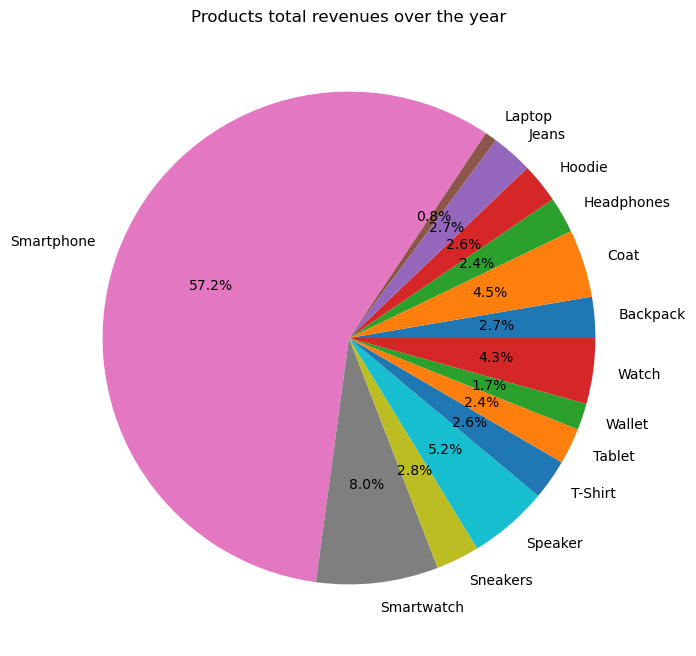

In [51]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(product_revenue_df['product_revenue'], labels = product_revenue_df['product'], autopct = '%1.1f%%')
ax.set_title("Products total revenues over the year")
plt.show()

# What was the average price of a product sold by the company?

In [54]:
product_avg_price = df_sales.groupby('product')['price'].mean()
#product_avg_price = pd.DataFrame(product_avg_price, columns = ['average price'])
product_avg_price_df = product_avg_price.reset_index(name = 'average_price')
product_avg_price_df

,product,average_price
0,Backpack,50.0
1,Coat,100.0
2,Headphones,100.0
3,Hoodie,40.0
4,Jeans,50.0
5,Laptop,1200.0
6,Smartphone,600.0
7,Smartwatch,200.0
8,Sneakers,80.0
9,Speaker,80.0


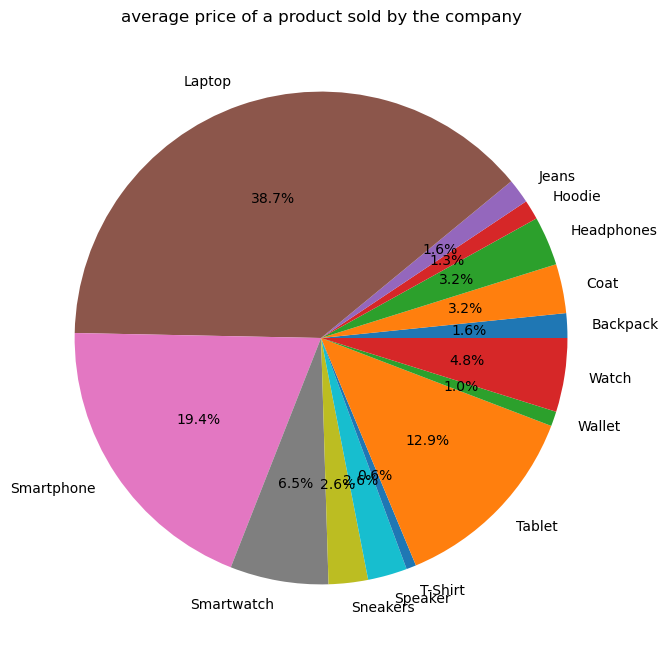

In [56]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(product_avg_price_df['average_price'], labels = product_avg_price_df['product'], autopct = '%1.1f%%')
ax.set_title("average price of a product sold by the company")
plt.show()

# What was the total quantity of products sold by the company?

In [59]:
product_avg_qnty = df_sales['quantity'].sum()
product_avg_qnty

5341.0

# Which category had the highest revenue? How much revenue did it generate?

In [62]:
catg_revenue = df_sales.groupby('category')['revenue'].sum()
catg_revenue_df = catg_revenue.reset_index(name = 'category_revenue')
catg_revenue_df

,category,category_revenue
0,Accessories,106700.0
1,Bags,19500.0
2,Bgas,900.0
3,Clohting,1200.0
4,Clothing,93150.0
5,Electronics,516080.0
6,Shoes,20640.0
7,Shoeses,960.0


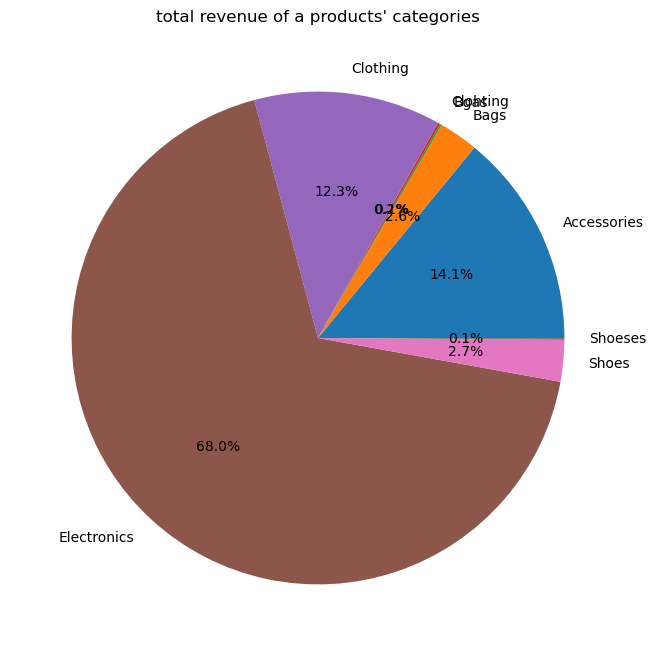

In [64]:
fig, ax = plt.subplots(figsize = (8,8))
ax.pie(catg_revenue_df['category_revenue'], labels = catg_revenue_df['category'], autopct = '%1.1f%%')
ax.set_title("total revenue of a products' categories")
plt.show()

In [66]:
catg_revenue_df.loc[catg_revenue_df['category_revenue'].idxmax()]['category']

'Electronics'

In [68]:
catg_revenue_df['category_revenue'].max()

516080.0

# What was the average revenue per sale?

In [71]:
product_revenue_avg = df_sales.groupby('product')['revenue'].mean()
product_revenue_avg_df = product_revenue_avg.reset_index(name = 'avg_revenue')
product_revenue_avg_df

,product,avg_revenue
0,Backpack,850.000000
1,Coat,965.714286
2,Headphones,1384.615385
3,Hoodie,860.869565
4,Jeans,860.416667
5,Laptop,6000.000000
6,Smartphone,5297.560976
7,Smartwatch,1688.888889
8,Sneakers,900.000000
9,Speaker,1587.200000


In [73]:
product_revenue_avg_df['avg_revenue'].mean()

1822.184055106933

# What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)

In [76]:
quarter = []
for date in df_sales['date']:
    quarter.append(date.quarter)

df_sales['quarter'] = quarter

In [78]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, 0 to 368
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      368 non-null    datetime64[ns]
 1   product   368 non-null    object        
 2   category  368 non-null    object        
 3   price     368 non-null    float64       
 4   quantity  368 non-null    float64       
 5   revenue   368 non-null    float64       
 6   quarter   368 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 23.0+ KB


In [80]:
quarter_revenue = df_sales.groupby('quarter')['revenue'].sum()
quarter_revenue_df = quarter_revenue.reset_index(name = 'quarter_revenue')
quarter_revenue_df

,quarter,quarter_revenue
0,1,182100.0
1,2,185970.0
2,3,197680.0
3,4,193380.0


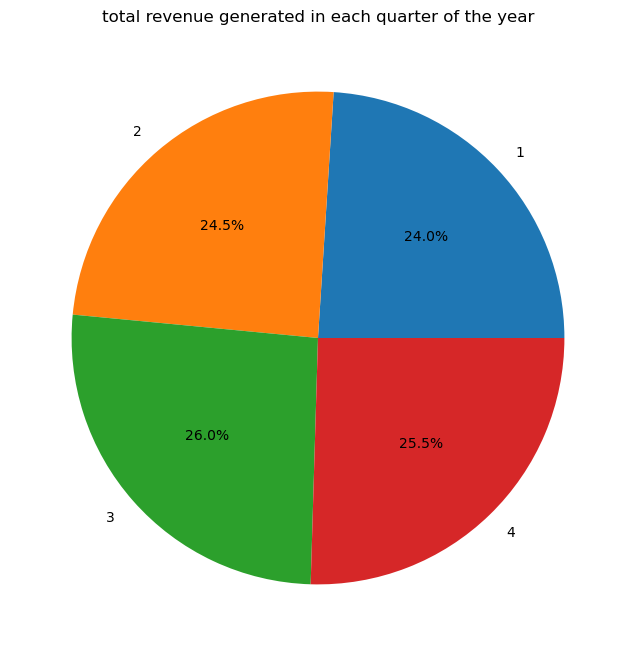

In [82]:
fig, ax = plt.subplots(figsize = (8,8))
ax.pie(quarter_revenue_df['quarter_revenue'], labels = quarter_revenue_df['quarter'], autopct = '%1.1f%%')
ax.set_title("total revenue generated in each quarter of the year")
plt.show()

In [85]:
df_sales.to_csv('sales_data_cleaned.csv')